___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

In this NLP project I will classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. I will utilize the pipeline methods for more complex tasks.

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


## Imports
 **Importing the libraries**

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

**Reading the yelp.csv file and set it as a dataframe called yelp.**

In [79]:
yelp = pd.read_csv('yelp.csv')

**Checking the head, info,and describe methods on yelp.**

In [80]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [81]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [82]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [83]:
yelp['text length'] = yelp['text'].apply(len)

# EDA

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

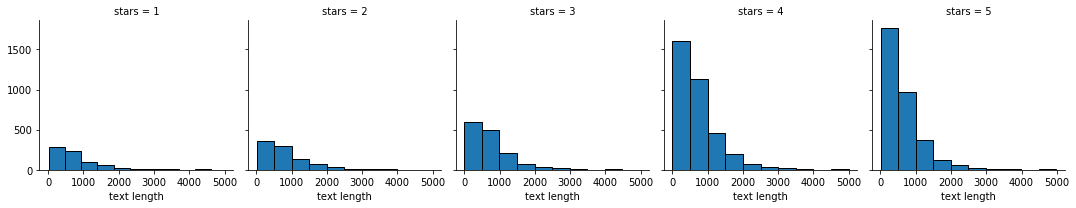

In [84]:
plt.rcParams["patch.force_edgecolor"] = True
FGrid = sns.FacetGrid(yelp, col = 'stars')
FGrid.map(plt.hist, 'text length')

**Creating a boxplot of text length for each star category.**

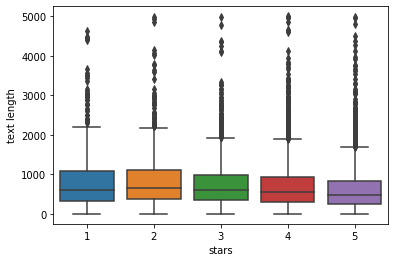

In [85]:
sns.boxplot(x = 'stars', y = 'text length', data = yelp)

**Creating a countplot of the number of occurrences for each type of star rating.**

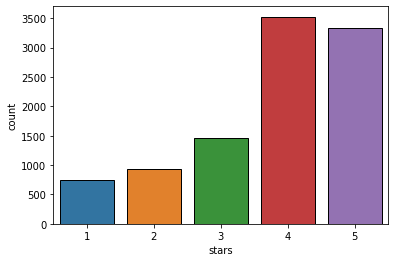

In [86]:
sns.countplot(x = 'stars', data = yelp)

**Using groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [87]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Using the corr() method on that groupby dataframe to produce this dataframe:**

In [88]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then using seaborn to create a heatmap based off that .corr() dataframe:**

(4.0, 0.0)

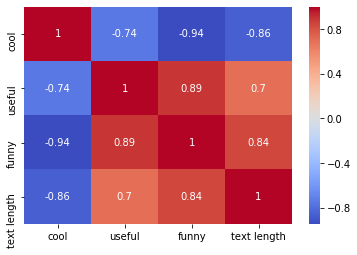

In [89]:
plt.figure(figsize=(6,4))
heat_yelp = sns.heatmap(stars.corr(), cmap = 'coolwarm', annot = True)
bottom, top = heat_yelp.get_ylim()
heat_yelp.set_ylim(bottom + 0.5, top - 0.5)

## NLP Classification Task

To make things a little easier, I'll only grab reviews that were either 1 star or 5 stars.

**Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [98]:
yelp_class = yelp[(yelp.stars == 1) | (yelp.stars == 5)]

**Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [99]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
yelp_count = CountVectorizer()

**Using the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [101]:
X = yelp_count.fit_transform(X)

## Train Test Split

**Splitting our data into training and testing data.**

**Using train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101**

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training a Model

**Importing MultinomialNB and creating an instance of the estimator and call is nb.**

In [107]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [108]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

**Using the predict method off of nb to predict labels from X_test.**

In [109]:
predictions = nb.predict(X_test)

**Creating a confusion matrix and classification report using these predictions and y_test**

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [112]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(metrics.accuracy_score(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



0.9257748776508973


# Using Text Processing

**Importing TfidfTransformer from sklearn.**

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer

**Importing Pipeline from sklearn.**

In [115]:
from sklearn.pipeline import Pipeline

**Creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [133]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [134]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. Remember we can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [135]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Predictions and Evaluation

**Using the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [136]:
predictions = pipeline.predict(X_test)

In [137]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(metrics.accuracy_score(y_test, predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



0.8140293637846656


C:\Users\emreo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more I can play with so I will exclude Tf-Idf in the pipeline.**

In [138]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [139]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [141]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [142]:
predictions = pipeline.predict(X_test)

In [143]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(metrics.accuracy_score(y_test, predictions))

[[203  25]
 [ 12 986]]


              precision    recall  f1-score   support

           1       0.94      0.89      0.92       228
           5       0.98      0.99      0.98       998

    accuracy                           0.97      1226
   macro avg       0.96      0.94      0.95      1226
weighted avg       0.97      0.97      0.97      1226



0.9698205546492659


**Pipeline gave better results without Tf-Idf.**